In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os, sys 
sys.path.append('..')
import collections
import copy
import itertools
import aoc_utils as au
import math 
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
input_text = au.read_txt_file_lines()
n_rows = len(input_text)
n_cols = len(input_text[0])
for ii in range(1, n_rows):
    assert len(input_text[ii]) == n_cols, f'row {ii} has {len(input_text[ii])} cols, not {n_cols}'
print(f'input has {n_rows} rows and {n_cols} cols')

input has 15 rows and 15 cols


## THoughts
- Just want to minimise turns

13 1 1 13


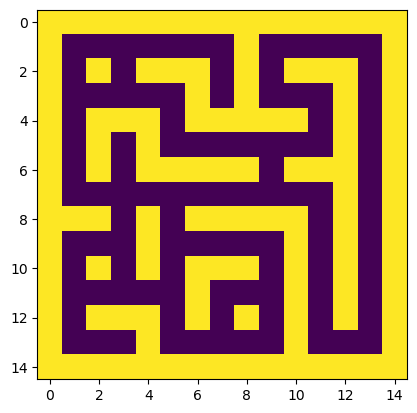

In [4]:
n = n_rows
maze = np.zeros((n, n), dtype=int)

for ir, r in enumerate(input_text):
    for ic, c in enumerate(r):
        if c == 'S':
            start_r, start_c = ir, ic
        elif c == 'E':
            end_r, end_c = ir, ic
        elif c == '#':
            maze[ir, ic] = 1

plt.imshow(maze, interpolation='none')

print(start_r, start_c, end_r, end_c)

In [5]:
dir_dict = {
    (1, 0): [(1, 0), (0, 1), (0, -1)],
    (-1, 0): [(0, 1), (-1, 0), (0, -1)],
    (0, 1): [(1, 0), (0, 1), (-1, 0)],
    (0, -1): [(1, 0), (-1, 0), (0, -1)]
}

dir_dict_diff = {
    (1, 0): [(0, 1), (0, -1)],
    (-1, 0): [(0, 1), (0, -1)],
    (0, 1): [(1, 0), (-1, 0)],
    (0, -1): [(1, 0), (-1, 0)]
}

dir_dict

{(1, 0): [(1, 0), (0, 1), (0, -1)],
 (-1, 0): [(0, 1), (-1, 0), (0, -1)],
 (0, 1): [(1, 0), (0, 1), (-1, 0)],
 (0, -1): [(1, 0), (-1, 0), (0, -1)]}

In [11]:
dirs = [(1, 0), (0, 1), (-1, 0), (0, -1)]

def backtrack(xy, curr_dir, curr_path, curr_cost, best_cost):
    if xy == (end_r, end_c):
        # print(curr_cost)
        # assert False, curr_cost
        if curr_cost < best_cost:
            best_cost = curr_cost
            print('new best', best_cost)
            print(curr_path)
        return best_cost
    
    # # print(xy)
    # keep_going = True
    # while keep_going:
    #     for d in dir_dict_diff[curr_dir]:
    #         xn = xy[0] + d[0]
    #         yn = xy[1] + d[1]
    #         if maze[xn, yn] == 0:
    #             keep_going = False 
    #             break 

    #     if keep_going and (maze[xy[0] + curr_dir[0], xy[1] + curr_dir[1]] == 0):
    #         curr_cost += 1
    #         xy = (xy[0] + curr_dir[0], xy[1] + curr_dir[1])
    #         curr_path.add(xy)
    #     else:
    #         keep_going = False
    #         break

    for d in dir_dict[curr_dir]:
        if d == curr_dir:
            curr_cost += 1
        else:
            curr_cost += 1001

        xn = xy[0] + d[0]
        yn = xy[1] + d[1]

        # print(d, xn, yn)
        
        if maze[xn, yn] == 0 and (xn, yn) not in curr_path:
            curr_path.add((xn, yn))
            best_cost = backtrack((xn, yn), d, curr_path, curr_cost, best_cost)
            curr_path.remove((xn, yn))

    return best_cost

# backtrack((start_r, start_c), (0, 1), set((start_r, start_c)), 0, np.inf)
backtrack((start_r, start_c), (-1, 0), set((start_r, start_c)), 1000, np.inf)

new best 50092
{1, (12, 1), 13, (5, 13), (3, 13), (9, 8), (11, 5), (13, 11), (11, 11), (13, 8), (7, 10), (8, 11), (11, 13), (6, 13), (12, 5), (11, 9), (1, 13), (13, 12), (7, 5), (12, 13), (9, 5), (11, 2), (10, 9), (9, 11), (13, 5), (7, 7), (7, 13), (12, 9), (9, 7), (8, 5), (11, 4), (11, 1), (10, 11), (9, 13), (13, 7), (2, 13), (13, 13), (7, 9), (7, 6), (12, 11), (4, 13), (9, 9), (9, 6), (11, 3), (10, 13), (8, 13), (13, 9), (13, 6), (7, 11), (7, 8)}
new best 34066
{1, (12, 1), 13, (3, 13), (5, 13), (11, 5), (13, 11), (11, 11), (7, 10), (8, 11), (10, 5), (11, 13), (6, 13), (1, 13), (13, 12), (7, 5), (12, 13), (11, 2), (9, 5), (9, 11), (7, 7), (7, 13), (11, 4), (8, 5), (11, 1), (9, 13), (10, 11), (2, 13), (13, 13), (7, 9), (7, 6), (12, 11), (4, 13), (11, 3), (8, 13), (10, 13), (7, 11), (7, 8)}


34066

In [15]:
maze[138:141, :3]

array([[1, 0, 1],
       [1, 0, 0],
       [1, 1, 1]])